<a href="https://colab.research.google.com/github/chonginbilly/Moringa_DS/blob/Moringa_python/Data_Cleaning_Group_Asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from datetime import datetime

%matplotlib inline

In [ ]:
data= pd.read_excel('/content/rollingsales_bronx.xlsx')
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5611 non-null   int64         
 1   NEIGHBORHOOD                    5611 non-null   object        
 2   BUILDING CLASS CATEGORY         5611 non-null   object        
 3   TAX CLASS AT PRESENT            5611 non-null   object        
 4   BLOCK                           5611 non-null   int64         
 5   LOT                             5611 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       5611 non-null   object        
 8   ADDRESS                         5611 non-null   object        
 9   APARTMENT NUMBER                548 non-null    object        
 10  ZIP CODE                        5611 non-null   int64         
 11  RESI

In [ ]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
data['BOROUGH'].value_counts()

2    5611
Name: BOROUGH, dtype: int64

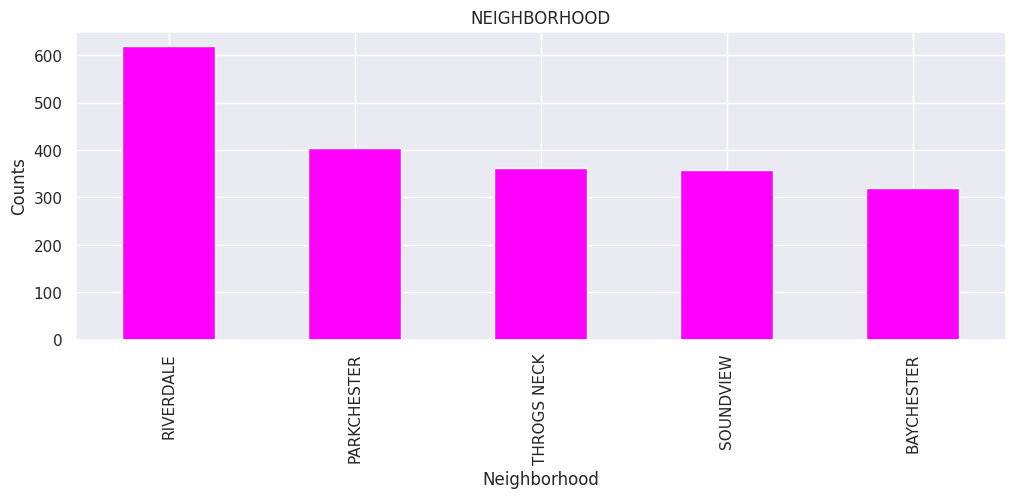

In [ ]:
# NEIGHBORHOOD
plt.figure(figsize = (12,4))
data['NEIGHBORHOOD'].value_counts()[:5].plot(kind = 'bar', color = 'magenta')
plt.title('NEIGHBORHOOD')
plt.xlabel('Neighborhood')
plt.ylabel('Counts')
plt.show()

In [ ]:
data.rename(columns = {'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY',
                       'TAX CLASS AT PRESENT': 'TAX_CLASS'}, inplace = True)

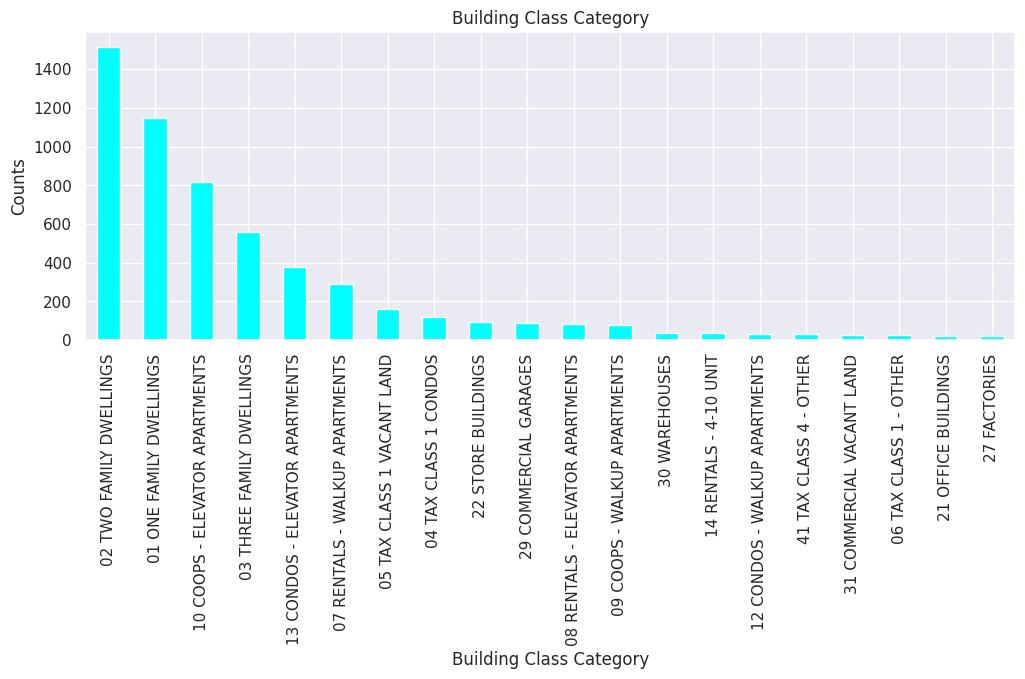

In [ ]:
# BUILDING_CLASS_CATEGORY
plt.figure(figsize = (12,4))
data['BUILDING_CLASS_CATEGORY'].value_counts()[:20].plot(kind = 'bar', color = 'cyan')
plt.title('Building Class Category')
plt.xlabel('Building Class Category')
plt.ylabel('Counts')
plt.show()

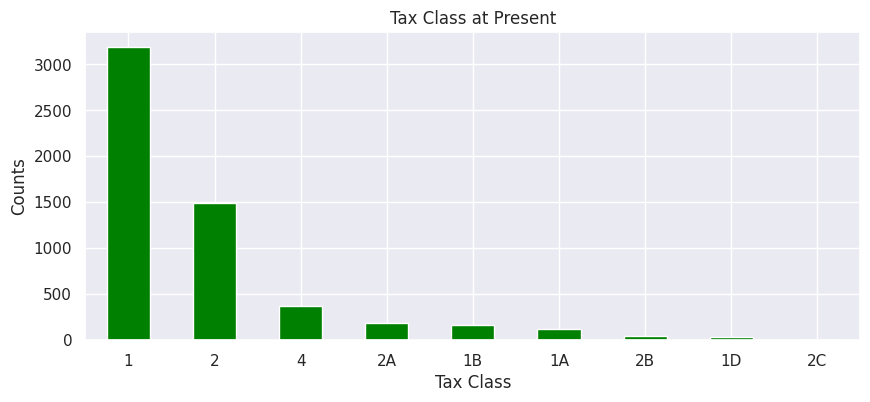

In [ ]:
# Tax Class at Present
plt.figure(figsize = (10,4))
data['TAX_CLASS'].value_counts().plot(kind = 'bar', color = 'green', rot = 0)
plt.title('Tax Class at Present')
plt.xlabel('Tax Class')
plt.ylabel('Counts')
plt.show()

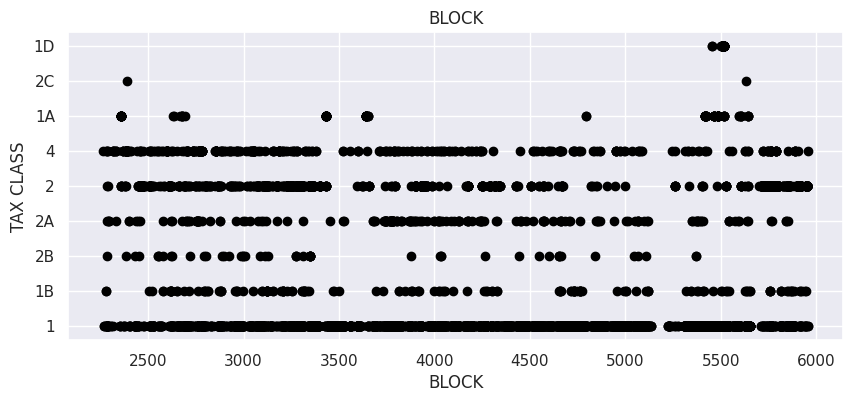

In [ ]:
# BLOCK
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['TAX_CLASS'], color = 'black')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('TAX CLASS')
plt.show()

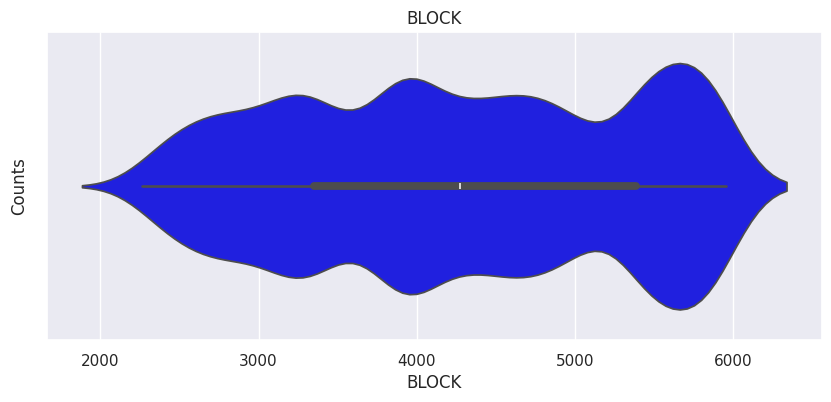

In [ ]:
plt.figure(figsize = (10,4))
sns.violinplot(x='BLOCK', data=data, color = 'blue')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('Counts')
plt.show()

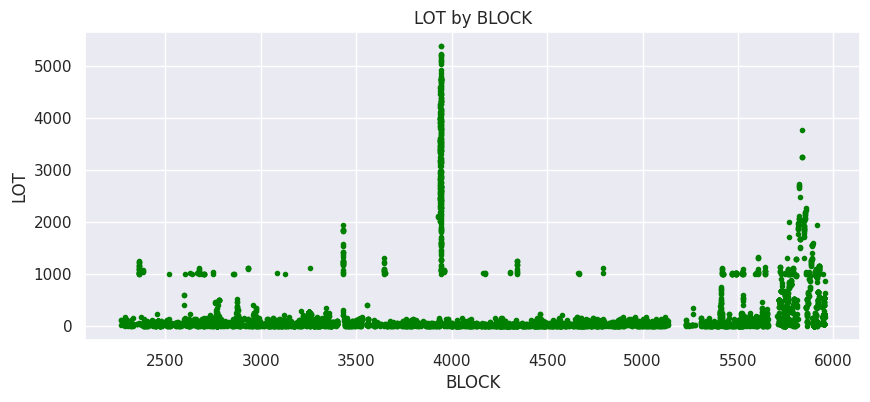

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['LOT'], color = 'green', marker= '.')
plt.title('LOT by BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('LOT')
plt.show()

In [ ]:
data.drop('EASEMENT', axis = 1, inplace = True)

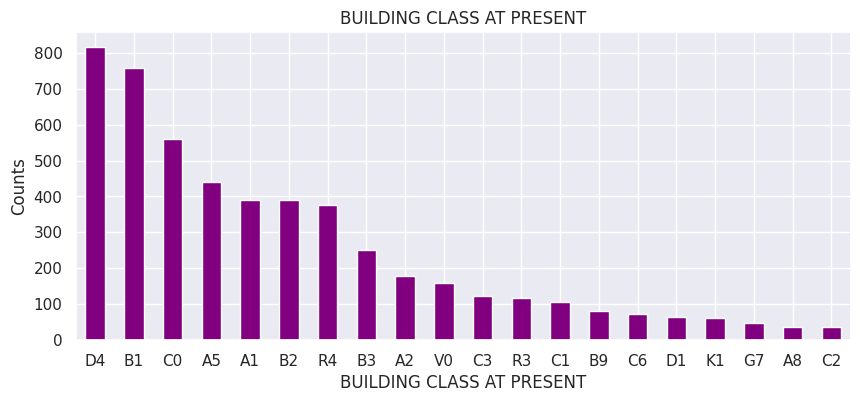

In [ ]:
plt.figure(figsize = (10,4))
data['BUILDING CLASS AT PRESENT'].value_counts()[:20].plot(kind = 'bar', color = 'purple', rot = 0)
plt.title('BUILDING CLASS AT PRESENT')
plt.xlabel('BUILDING CLASS AT PRESENT')
plt.ylabel('Counts')
plt.show()

In [ ]:
data['RESIDENTIAL UNITS'].isnull().sum()

965

In [ ]:
residential_mean = data['RESIDENTIAL UNITS'].mean().round(0)
residential_mean

4.0

In [ ]:
residential_mean = data['RESIDENTIAL UNITS'].mean().round(0)
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].fillna(residential_mean)
data['RESIDENTIAL UNITS'].value_counts()[:20]

1.0     1634
2.0     1526
4.0     1104
3.0      567
0.0      509
6.0       21
5.0       21
8.0       16
10.0      15
7.0       12
21.0       9
13.0       8
15.0       7
28.0       7
60.0       7
81.0       5
54.0       5
16.0       5
30.0       5
14.0       5
11.0       4
49.0       4
20.0       4
Name: RESIDENTIAL UNITS, dtype: int64

In [ ]:
commercial_median = data['COMMERCIAL UNITS'].median().round(0)
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].fillna(commercial_median)
data['COMMERCIAL UNITS'].value_counts()

0.0      5202
1.0       252
2.0        61
3.0        34
252.0      19
4.0        14
5.0         9
6.0         8
10.0        6
9.0         3
12.0        1
7.0         1
23.0        1
Name: COMMERCIAL UNITS, dtype: int64

In [ ]:
data['TOTAL UNITS'] = data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']
data['TOTAL UNITS'].isnull().sum()

0

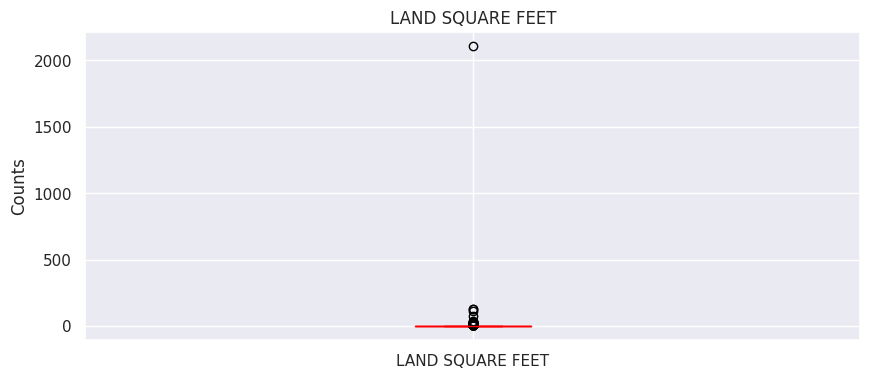

In [ ]:
plt.figure(figsize = (10,4))
land_median = data['LAND SQUARE FEET'].median()
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(land_median)
data['LAND SQUARE FEET'].value_counts().plot(kind = 'box', color = 'red')
plt.title('LAND SQUARE FEET')
plt.ylabel('Counts')
plt.show()

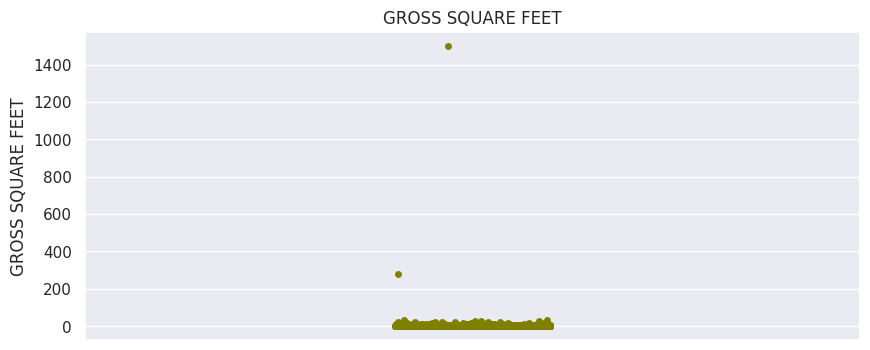

In [ ]:
plt.figure(figsize = (10,4))
gorss_median = data['GROSS SQUARE FEET'].median()
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(gorss_median)
gross_counts = data['GROSS SQUARE FEET'].value_counts()
sns.stripplot(gross_counts, color = 'olive')
plt.title('GROSS SQUARE FEET')
plt.show()

In [ ]:
data['YEAR BUILT'] = pd.to_datetime(data['YEAR BUILT'], format = '%Y',errors='coerce')
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'],format='%m/%d/%y',errors='coerce').fillna(pd.Timestamp.min)
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,NaN,10457,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,NaN,10457,1.0,0.0,1.0,1782.0,1548.0,1899-01-01,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,S0,2364 WASHINGTON AVENUE,NaN,10458,1.0,2.0,3.0,1911.0,4080.0,1931-01-01,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,B9,454 EAST 172 STREET,NaN,10457,2.0,0.0,2.0,1658.0,1428.0,1901-01-01,1.0,B9,350000.0,2023-06-26


In [ ]:
data[data['YEAR BUILT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
20,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3036,63,B1,457 EAST 179TH STREET,NaN,10457,2.0,0.0,2.0,2500.0,2196.0,NaT,NaN,NaN,NaN,1677-09-21 00:12:43.145224193
21,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3039,106,B1,442 EAST 185 STREET,NaN,10458,2.0,0.0,2.0,2500.0,2196.0,NaT,NaN,NaN,NaN,1677-09-21 00:12:43.145224193
22,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3040,15,B2,462 E 187TH ST,NaN,10458,2.0,0.0,2.0,2500.0,2196.0,NaT,NaN,NaN,NaN,1677-09-21 00:12:43.145224193
23,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3045,16,B3,2060 BATHGATE AVENUE,NaN,10457,2.0,0.0,2.0,2500.0,2196.0,NaT,NaN,NaN,NaN,1677-09-21 00:12:43.145224193
24,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3045,17,B2,2064 BATHGATE AVENUE,NaN,10457,2.0,0.0,2.0,2500.0,2196.0,NaT,NaN,NaN,NaN,1677-09-21 00:12:43.145224193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,2,WILLIAMSBRIDGE,05 TAX CLASS 1 VACANT LAND,1B,4665,71,V0,724 EAST 218 STREET,NaN,10467,0.0,0.0,0.0,2850.0,0.0,NaT,1.0,V0,225000.0,2023-02-09 00:00:00.000000000
5489,2,WILLIAMSBRIDGE,06 TAX CLASS 1 - OTHER,1,4861,26,G0,945 EAST 225 STREET,NaN,10466,0.0,0.0,0.0,2725.0,0.0,NaT,1.0,G0,0.0,2023-06-01 00:00:00.000000000
5528,2,WILLIAMSBRIDGE,29 COMMERCIAL GARAGES,4,4660,18,G7,730 EAST 213 STREET,NaN,10467,0.0,0.0,0.0,2000.0,0.0,NaT,4.0,G7,1300000.0,2023-07-06 00:00:00.000000000
5529,2,WILLIAMSBRIDGE,29 COMMERCIAL GARAGES,4,4664,34,G7,727 EAST 216 STREET,NaN,10467,0.0,0.0,0.0,2854.0,0.0,NaT,4.0,G7,3025000.0,2023-02-01 00:00:00.000000000


In [ ]:
data.shape

(5611, 20)